Data used : https://www.kaggle.com/datasets/ashishkumarak/chatgpt-reviews-daily-updated/data

In [1]:
#pip install emoji  
#!pip install textblob
#!pip3 install wordcloud

##-- install if not already installed
import sys
print(sys.executable)

!{sys.executable} -m pip install textblob

/Users/williamsempire/anaconda3/bin/python


In [2]:
import pandas as pd
import re
import emoji
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob


In [3]:
file_path = '/Users/williamsempire/Desktop/Columbia/Courses/5067 NLP/FinalProj/chatgpt_reviews_daily_updated.csv'
df = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)

In [4]:
# Check the first few rows of the dataset
print("Dataset Head:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

Dataset Head:
                               reviewId       userName  \
0  764bde06-e9d2-4211-97a2-f4f64bcf907d       M A saad   
1  36788635-5d48-4a4e-abdd-7fadffc07ac1   Sudip Sarkar   
2  74a2c5ec-2bdb-4784-ab8a-90224d65d981   Sehlule Moyo   
3  0f7a206b-4a5c-4b67-ad59-54e4d3cefe01  Preethi Preru   
4  e8f1438a-3734-4213-9884-aa33a9b79672   Fayzan Vhora   

                        content  score  thumbsUpCount reviewCreatedVersion  \
0                   very active      5              0           1.2024.310   
1               very nice app 🥰      5              0           1.2024.268   
2                      good app      4              0           1.2024.268   
3                     very good      5              0           1.2024.310   
4  this is nice app for student      3              0           1.2024.310   

                    at  appVersion  
0  2024-11-18 13:31:58  1.2024.310  
1  2024-11-18 13:31:31  1.2024.268  
2  2024-11-18 13:31:05  1.2024.268  
3  2024-11-18 13:29:

In [5]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

#### Observations: 
1. The dataset has 273,560 entries and 8 columns.
2. Missing values: 
- userName: 2 missing values (can be ignored or filled with "Unknown").
- content: 9 missing values (important for text-based analysis; we may need to drop these rows).
- reviewCreatedVersion and appVersion: 24,090 missing values each (similar to your earlier dataset, you can fill these with "Unknown").


3. Drop 'creviewCreatedVersion' column, since its the same as appVersion column

4. split 'at' column to  date and time as 2 different columns 

5. rename content column as comment 


In [6]:
df = df.drop(columns=['reviewCreatedVersion'])
df = df.drop(columns=['thumbsUpCount'])

# Confirm the column has been removed
print(df.columns)

Index(['reviewId', 'userName', 'content', 'score', 'at', 'appVersion'], dtype='object')


In [7]:
#rename 'content' column as 'comment'
df = df.rename(columns={'content': 'comment'})
df = df.rename(columns={'at': 'date_time'})

# Confirm the change
print(df.columns)

Index(['reviewId', 'userName', 'comment', 'score', 'date_time', 'appVersion'], dtype='object')


In [8]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

result = df.sample(n=20, random_state=3)
result

,reviewId,userName,comment,score,date_time,appVersion
231359,da6e722a-5545-4603-b612-0486e6e3fe09,Jared Blevins,very helpful 👌,4,2024-04-25 12:29:27,1.2024.108
156031,4ef4e0ba-57fb-4623-bb64-1589204483d3,Raju Sahu,it is awesome if you want to succeed in your life you must try it 😜,5,2024-05-17 18:55:37,1.2024.122
42998,f3a1a230-d965-4d87-b32d-8bf162fdccc5,Varun Sharma,very helpful,5,2024-09-29 09:09:51,1.2024.262
93164,bdbb67cd-070b-48cb-a4ba-34d9ac235cc6,Md Sogier,Good,5,2024-08-06 16:07:22,NaN
26954,f5131761-5ef7-40c9-ab63-6d7d2507d710,Lakshitha Shiromal,මේකනම් පට්ට ❤️,5,2024-10-17 03:35:34,1.2024.282
270058,f41011c6-2d96-4e25-957f-07a7855ac592,Hamid Khosh,"Nice , perfect",5,2023-07-25 20:07:26,1.0.0016
134541,52fd95c5-bf5a-43c2-892c-9473a6e7caad,Opemipo Williams,Great,5,2024-06-12 14:14:08,NaN
248368,995874e4-fdf7-428a-bbe0-7774eaf6ba8b,Sushi kumar Shrivastwa,bahut mast,5,2024-03-04 10:20:50,1.2024.052
68313,479012b4-45ef-4109-9acb-d09c469dcd06,Therese Himaya,Its my study buddy,5,2024-09-02 11:47:08,1.2024.206
143827,32074521-a98b-48cb-a8bd-0d516752c989,Amidral VIp,pretty,5,2024-05-29 12:49:06,1.2024.139


In [9]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
reviewId          0
userName          2
comment           9
score             0
date_time         0
appVersion    24131
dtype: int64


## Handle Missing Values

In [10]:
# Fill missing values for appVersion and reviewCreatedVersion with "Unknown"
df['appVersion'].fillna('Unknown', inplace=True)

# Drop rows where 'content' is missing (as this is critical for analysis)
df = df.dropna(subset=['comment'])

# Fill missing userName with "Unknown"
df['userName'].fillna('Unknown', inplace=True)

# Verify missing values are handled
print("Missing Values After Handling:")
print(df.isnull().sum()) 

Missing Values After Handling:
reviewId      0
userName      0
comment       0
score         0
date_time     0
appVersion    0
dtype: int64


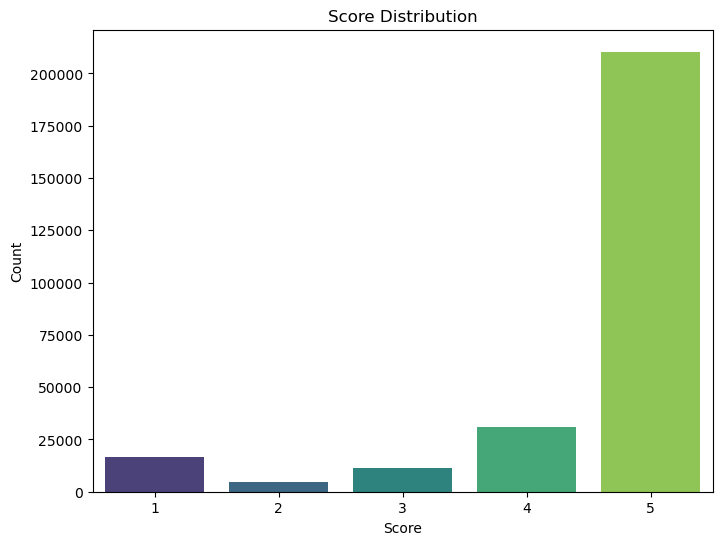

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Score Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


In [12]:
# Top App Versions by Review Count
print("\nTop 10 App Versions by Review Count:")
print(df['appVersion'].value_counts().head(10))


Top 10 App Versions by Review Count:
appVersion
Unknown       24128
1.2024.226    15856
1.2024.268    15558
1.2024.206    12381
1.2024.177     8817
1.2024.131     8775
1.2024.170     8414
1.2024.073     8376
1.2024.080     6769
1.2024.157     5848
Name: count, dtype: int64


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 274341 entries, 0 to 274349
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewId    274341 non-null  object
 1   userName    274341 non-null  object
 2   comment     274341 non-null  object
 3   score       274341 non-null  int64 
 4   date_time   274341 non-null  object
 5   appVersion  274341 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.7+ MB
None


In [14]:
# Convert the original 'date_time' column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract 'date' and 'time' as diff columns
df['date'] = df['date_time'].dt.date
df['time'] = df['date_time'].dt.time

In [15]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

result = df.sample(n=20, random_state=3)
result

,reviewId,userName,comment,score,date_time,appVersion,date,time
199509,716eb594-bf25-4333-9008-fff84796f76e,David Cacciatore,finally! something that can keep up and keep firing back at me! Great work,5,2023-09-08 20:13:38,1.0.0039,2023-09-08,20:13:38
249329,559e46ce-613e-4e89-865a-a1e52083fdbb,Bharath Bharath,good support,5,2024-02-14 14:52:09,1.2024.038,2024-02-14,14:52:09
200048,b314c003-b7bd-4424-ae20-2694dd77660e,Kenneth Clay,"I didn't think it was too good a few years ago, but chatgpt is for me 100",5,2023-11-30 21:06:52,1.2023.314,2023-11-30,21:06:52
66790,f77a8a33-037c-482e-a9c6-2e5500353817,Amarkant Mandal,"I was actually an ignorant. But after using ChatGPT, now it feels like, I'm an all rounded deep knowledgeable person. Any questions' answers, you need, just ask our brother cgpt. Also it's free to use but needs premium for more features. We can't rely 100% on gpt as sometimes it makes mistakes, but we can ask to recheck then it corrects & apologizes too haha. So,""Instead of spending much time, chatting on messenger, WhatsApp, insta, do chat with chatgpt."" You can be a polymath one-day. 😎😅",5,2024-09-03 18:18:29,1.2024.226,2024-09-03,18:18:29
181511,85df9517-1079-4a6d-bb2d-35f687716585,David Frech,"I am having a hard time logging in. Every time when successfully logging in, it just brings me back to the sign-in-menu. Can't use the app.",1,2023-07-28 08:16:41,1.0.0023,2023-07-28,08:16:41
143079,9df94171-837e-4a1d-b871-e4aa51e8394b,olanrewaju alaba,absolutely outstanding,5,2024-05-30 07:12:57,1.2024.115,2024-05-30,07:12:57
77237,90935507-b48d-4065-8701-e787be9866c7,Rupali Pramod Desai,good it very good,5,2024-08-24 09:21:25,1.2024.226,2024-08-24,09:21:25
71596,7b0e7d8b-7163-4198-ae4c-165e7a0bc891,Dina Moradi,"after months of working perfectly, now I get this error consistently: ""this request is invalid. try again later."" for as long as it wants and suddenly it works ok again. once for 10 hours, until i erased the app and installd it again. and now it has showen up again. why? what should I do?",5,2024-08-29 18:14:28,1.2024.226,2024-08-29,18:14:28
41783,ecf4e172-890b-4315-bfa2-24ba4007b85b,Sarita Jadaun,helpful,5,2024-09-30 14:42:19,1.2024.262,2024-09-30,14:42:19
50371,6adb223c-c911-41ab-886e-4158f8878a12,Pinky Singh,best chatGPT in world,4,2024-09-20 13:50:48,Unknown,2024-09-20,13:50:48


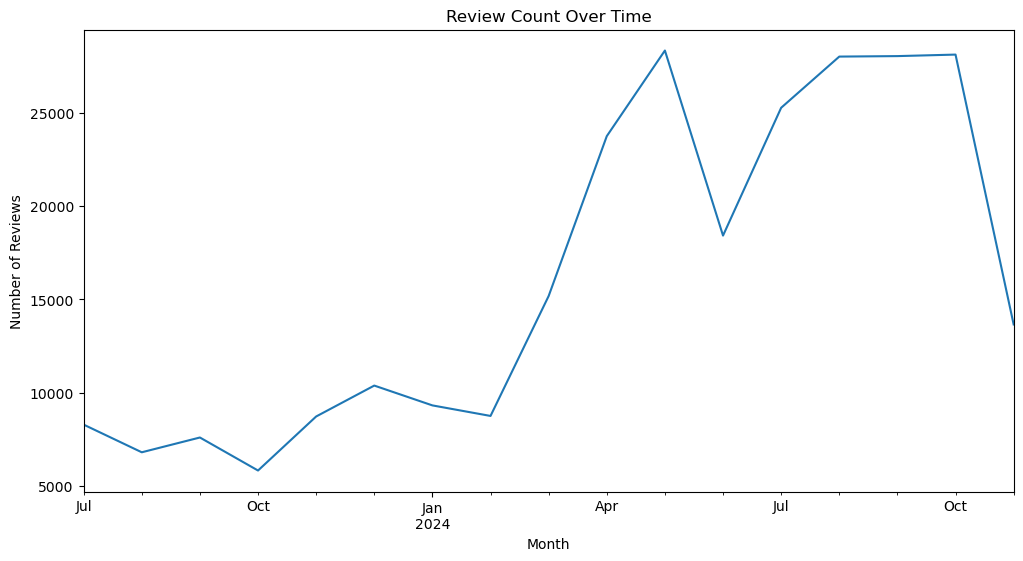

In [16]:
# Group reviews by month and count them
df['date_time'].dt.to_period('M').value_counts().sort_index().plot(
    kind='line', figsize=(12, 6), title='Review Count Over Time'
)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

Observations:

1. The number of reviews starts relatively low in the earlier months and gradually increases over time, peaking around April 2024.
2. There’s a noticeable spike in reviews, potentially correlating with a significant app update or promotional event.

Next I will asign the labels - Positive, Negative or Ney=utal to each review based on the score/ratinge the customer gave; and then I will re-plot the review counts based on the Sentiment Trends
 

In [17]:
# Add sentiment labels based on score and call it 'Score Sentiment'
def label_sentiment(score):
    if score >= 4: #scores 4 and 5 will be 'Positive'
        return 'Positive score'
    elif score == 3:      
        return 'Neutral score' #score '3' will be Neutral
    else:
        return 'Negative score' #scores 2,1,0 will be 'Negative'

df['Score_Sentiment'] = df['score'].apply(label_sentiment)

# Verify the distribution of sentiments
print("Sentiment Distribution:")
print(df['Score_Sentiment'].value_counts())

Sentiment Distribution:
Score_Sentiment
Positive score    241568
Negative score     21499
Neutral score      11274
Name: count, dtype: int64


In [18]:
#We’ll group the reviews by month and calculate the count of each sentiment per month.
# Group by month and count sentiment labels
score_sentiment_over_time = df.groupby([df['date_time'].dt.to_period('M'), 'Score_Sentiment']).size().unstack()

# Fill missing values with 0 (in case some months lack specific sentiment categories)
score_sentiment_over_time = score_sentiment_over_time.fillna(0)

# Display the table for reference
print(score_sentiment_over_time.head())

Score_Sentiment  Negative score  Neutral score  Positive score
date_time                                                     
2023-07                     826            339            7118
2023-08                     844            309            5648
2023-09                     656            271            6666
2023-10                     443            216            5165
2023-11                     680            332            7707


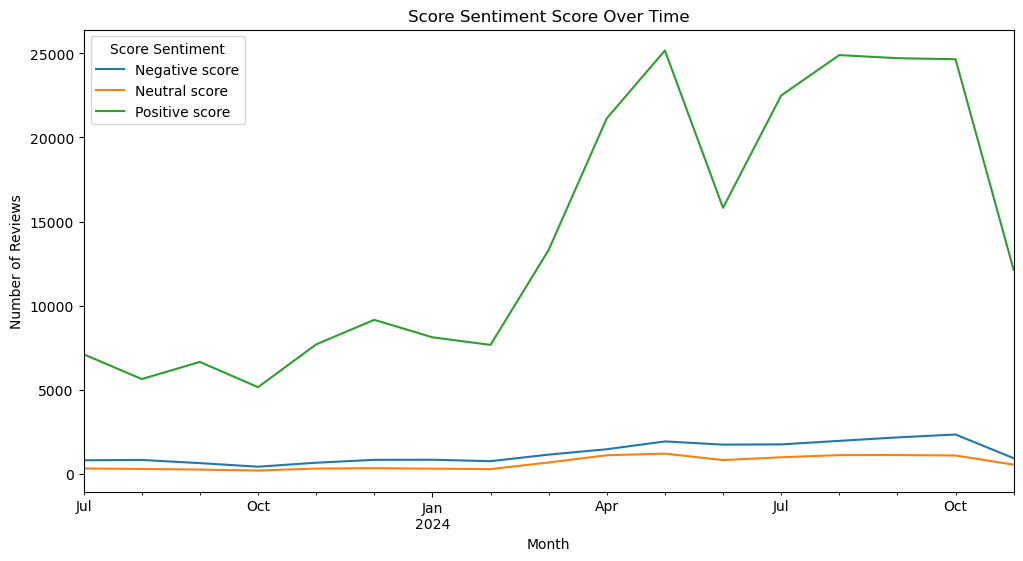

In [19]:
# Plot sentiment trends over time
score_sentiment_over_time.plot(kind='line', figsize=(12, 6), title='Score Sentiment Score Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend(title='Score Sentiment')
plt.show()

Observations:

Positive scores far outweigh negative and neutral scores throughout the timeline, which is a strong indicator of overall user satisfaction.
Spikes in positive score correlate with increased review activity, such as around April 2024.

Negative reviews remain relatively low but show slight increases around major spikes in total reviews. This may indicate that some updates introduced issues or did not meet expectations for all users.

Neutral reviews remain consistently low across the timeline, which is common for app reviews, as users are more likely to express strong opinions (positive or negative).



Top 10 App Versions by Review Count:
appVersion
Unknown       24128
1.2024.226    15856
1.2024.268    15558
1.2024.206    12381
1.2024.177     8817
1.2024.131     8775
1.2024.170     8414
1.2024.073     8376
1.2024.080     6769
1.2024.157     5848
Name: count, dtype: int64


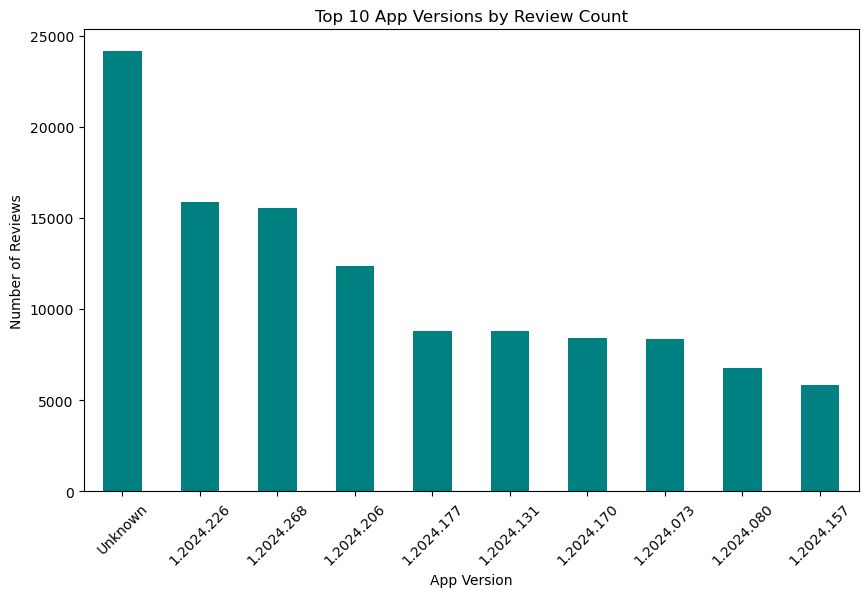

In [20]:
# Top App Versions by Review Count
print("\nTop 10 App Versions by Review Count:")
print(df['appVersion'].value_counts().head(10))

plt.figure(figsize=(10, 6))
df['appVersion'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 App Versions by Review Count')
plt.xlabel('App Version')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

In [21]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

result = df.sample(n=20, random_state=3)
result

,reviewId,userName,comment,score,date_time,appVersion,date,time,Score_Sentiment
199509,716eb594-bf25-4333-9008-fff84796f76e,David Cacciatore,finally! something that can keep up and keep firing back at me! Great work,5,2023-09-08 20:13:38,1.0.0039,2023-09-08,20:13:38,Positive score
249329,559e46ce-613e-4e89-865a-a1e52083fdbb,Bharath Bharath,good support,5,2024-02-14 14:52:09,1.2024.038,2024-02-14,14:52:09,Positive score
200048,b314c003-b7bd-4424-ae20-2694dd77660e,Kenneth Clay,"I didn't think it was too good a few years ago, but chatgpt is for me 100",5,2023-11-30 21:06:52,1.2023.314,2023-11-30,21:06:52,Positive score
66790,f77a8a33-037c-482e-a9c6-2e5500353817,Amarkant Mandal,"I was actually an ignorant. But after using ChatGPT, now it feels like, I'm an all rounded deep knowledgeable person. Any questions' answers, you need, just ask our brother cgpt. Also it's free to use but needs premium for more features. We can't rely 100% on gpt as sometimes it makes mistakes, but we can ask to recheck then it corrects & apologizes too haha. So,""Instead of spending much time, chatting on messenger, WhatsApp, insta, do chat with chatgpt."" You can be a polymath one-day. 😎😅",5,2024-09-03 18:18:29,1.2024.226,2024-09-03,18:18:29,Positive score
181511,85df9517-1079-4a6d-bb2d-35f687716585,David Frech,"I am having a hard time logging in. Every time when successfully logging in, it just brings me back to the sign-in-menu. Can't use the app.",1,2023-07-28 08:16:41,1.0.0023,2023-07-28,08:16:41,Negative score
143079,9df94171-837e-4a1d-b871-e4aa51e8394b,olanrewaju alaba,absolutely outstanding,5,2024-05-30 07:12:57,1.2024.115,2024-05-30,07:12:57,Positive score
77237,90935507-b48d-4065-8701-e787be9866c7,Rupali Pramod Desai,good it very good,5,2024-08-24 09:21:25,1.2024.226,2024-08-24,09:21:25,Positive score
71596,7b0e7d8b-7163-4198-ae4c-165e7a0bc891,Dina Moradi,"after months of working perfectly, now I get this error consistently: ""this request is invalid. try again later."" for as long as it wants and suddenly it works ok again. once for 10 hours, until i erased the app and installd it again. and now it has showen up again. why? what should I do?",5,2024-08-29 18:14:28,1.2024.226,2024-08-29,18:14:28,Positive score
41783,ecf4e172-890b-4315-bfa2-24ba4007b85b,Sarita Jadaun,helpful,5,2024-09-30 14:42:19,1.2024.262,2024-09-30,14:42:19,Positive score
50371,6adb223c-c911-41ab-886e-4158f8878a12,Pinky Singh,best chatGPT in world,4,2024-09-20 13:50:48,Unknown,2024-09-20,13:50:48,Positive score


# Preprocessing the data - by removing unnecessary noise and inconsistencies 

In [22]:
#Convert content in comment to lowercase
df['comment'] = df['comment'].str.lower()

#Remove specific punctuation marks while keeping question and exclamation marks
df['comment'] = df['comment'].apply(lambda x: re.sub(r'[.,;:]', '', x))

In [23]:
# Remove numbers
#df['comment'] = df['comment'].apply(lambda x: re.sub(r'\d+', '', x))

In [24]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

result = df.sample(n=20, random_state=11)
result

,reviewId,userName,comment,score,date_time,appVersion,date,time,Score_Sentiment
227549,b2bfa6ae-a4dc-4cd5-9e7c-8c42ae93f0cc,Rajan Das,it's great,5,2023-07-27 02:00:25,1.0.0022,2023-07-27,02:00:25,Positive score
104940,0005517c-a737-4ddb-bdaa-ad0e2f71262a,asheeda darus,speechless,5,2024-07-23 08:49:25,1.2024.198,2024-07-23,08:49:25,Positive score
107507,38f0ad01-c623-4527-9432-c9ca70d2b4fd,lohith 13,this application is amazing,5,2024-07-19 17:23:00,Unknown,2024-07-19,17:23:00,Positive score
140596,b2c44917-e66c-44d6-ac65-e1f2d47251af,lalita chaudhari,it is very usefully app,4,2024-06-02 01:54:09,1.2024.143,2024-06-02,01:54:09,Positive score
114650,2568b502-3eac-48a8-9e93-f7e5af9532df,Ko Myo AC,အသုံးပြုရတာ အဆင်ပြေပါတယ်,5,2024-07-10 13:03:41,1.2024.177,2024-07-10,13:03:41,Positive score
264106,982899de-d185-4200-948d-6c29382db448,Naman Verma gaming,i love it,5,2023-10-08 17:42:54,1.2023.263,2023-10-08,17:42:54,Positive score
129274,5d449276-84b5-4e0e-9b09-5f410a7adeaa,Austin,💯,5,2024-06-19 01:39:21,1.2024.157,2024-06-19,01:39:21,Positive score
121484,3af65f10-a468-4e9c-b414-166fac9e88f8,Sunflower Shop,not to much good,4,2024-07-02 15:09:29,1.2024.170,2024-07-02,15:09:29,Positive score
143900,693e2582-834e-45ef-9d30-79f5a3c1954c,Rahul Makvana,very good application very othentic ane genuine information use for esyley👍,5,2024-05-29 11:24:59,1.2024.080,2024-05-29,11:24:59,Positive score
208566,90d8c469-80e0-4c31-9a9f-0b400e11be04,Zac Faris,it has begun,5,2024-05-10 08:49:24,1.2024.122,2024-05-10,08:49:24,Positive score


In [25]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize the comment
df['tokens'] = df['comment'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/williamsempire/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Create a custom stopwords list that's less aggressive
custom_stopwords = set(stopwords.words('english')) - {'not', 'no', 'very', 'too', 'only', 'but', 'against'}

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/williamsempire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#Lemmatization - Reduce words to their root form (e.g., "running" -> "run") to ensure that similar words are grouped together.
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Define the cleaning and lemmatization function
def clean_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    cleaned = []

    for token in tokens:
        if token.isalnum():  # Keep only alphanumeric tokens
            if token not in custom_stopwords:  # Exclude stopwords
                cleaned.append(lemmatizer.lemmatize(token))  # Lemmatize
        else:
            # Keep emojis or special characters (optional, if needed)
            cleaned.append(token)

    return cleaned

# Apply the improved cleaning
df['cleaned_tokens'] = df['tokens'].apply(clean_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/williamsempire/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/williamsempire/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [28]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

result = df.sample(n=20, random_state=11)
result

,reviewId,userName,comment,score,date_time,appVersion,date,time,Score_Sentiment,tokens,cleaned_tokens
227549,b2bfa6ae-a4dc-4cd5-9e7c-8c42ae93f0cc,Rajan Das,it's great,5,2023-07-27 02:00:25,1.0.0022,2023-07-27,02:00:25,Positive score,"[it, 's, great]","['s, great]"
104940,0005517c-a737-4ddb-bdaa-ad0e2f71262a,asheeda darus,speechless,5,2024-07-23 08:49:25,1.2024.198,2024-07-23,08:49:25,Positive score,[speechless],[speechless]
107507,38f0ad01-c623-4527-9432-c9ca70d2b4fd,lohith 13,this application is amazing,5,2024-07-19 17:23:00,Unknown,2024-07-19,17:23:00,Positive score,"[this, application, is, amazing]","[application, amazing]"
140596,b2c44917-e66c-44d6-ac65-e1f2d47251af,lalita chaudhari,it is very usefully app,4,2024-06-02 01:54:09,1.2024.143,2024-06-02,01:54:09,Positive score,"[it, is, very, usefully, app]","[very, usefully, app]"
114650,2568b502-3eac-48a8-9e93-f7e5af9532df,Ko Myo AC,အသုံးပြုရတာ အဆင်ပြေပါတယ်,5,2024-07-10 13:03:41,1.2024.177,2024-07-10,13:03:41,Positive score,"[အသုံးပြုရတာ, အဆင်ပြေပါတယ်]","[အသုံးပြုရတာ, အဆင်ပြေပါတယ်]"
264106,982899de-d185-4200-948d-6c29382db448,Naman Verma gaming,i love it,5,2023-10-08 17:42:54,1.2023.263,2023-10-08,17:42:54,Positive score,"[i, love, it]",[love]
129274,5d449276-84b5-4e0e-9b09-5f410a7adeaa,Austin,💯,5,2024-06-19 01:39:21,1.2024.157,2024-06-19,01:39:21,Positive score,[💯],[💯]
121484,3af65f10-a468-4e9c-b414-166fac9e88f8,Sunflower Shop,not to much good,4,2024-07-02 15:09:29,1.2024.170,2024-07-02,15:09:29,Positive score,"[not, to, much, good]","[not, much, good]"
143900,693e2582-834e-45ef-9d30-79f5a3c1954c,Rahul Makvana,very good application very othentic ane genuine information use for esyley👍,5,2024-05-29 11:24:59,1.2024.080,2024-05-29,11:24:59,Positive score,"[very, good, application, very, othentic, ane, genuine, information, use, for, esyley👍]","[very, good, application, very, othentic, ane, genuine, information, use, esyley👍]"
208566,90d8c469-80e0-4c31-9a9f-0b400e11be04,Zac Faris,it has begun,5,2024-05-10 08:49:24,1.2024.122,2024-05-10,08:49:24,Positive score,"[it, has, begun]",[begun]


 ### Remoivng non-English comments

In [29]:
# pip install fasttext #Install fasttext  #Instal if not already intsalled

In [30]:
#A command to download a file using curl from a given URL
!curl -O https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125M  100  125M    0     0  38.0M      0  0:00:03  0:00:03 --:--:-- 38.0M


In [31]:
import fasttext

# Load the pre-trained language detection model
model = fasttext.load_model("lid.176.bin")

def is_english(text):
    if not isinstance(text, str):  # Check if the text is not a string
        return False  # Return False or handle as needed
    # Use the model to predict the language
    prediction = model.predict(text)
    language_code = prediction[0][0]  # Get the predicted language code
    return language_code == "__label__en"  # Check if it is English

# Filter the DataFrame to keep only English comments
english_df = df[df['comment'].apply(is_english)]

# Display the filtered DataFrame
print("Number of English comments:", english_df.shape[0])

Number of English comments: 248154


In [32]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

result = english_df.sample(n=20, random_state=11)
result

,reviewId,userName,comment,score,date_time,appVersion,date,time,Score_Sentiment,tokens,cleaned_tokens
123179,f217bd9c-dd53-4f51-b893-91671b0bfa2a,JOHN MELA,wow what a unique creation kudos guys🔥👍🔥,5,2024-06-30 16:35:48,1.2024.170,2024-06-30,16:35:48,Positive score,"[wow, what, a, unique, creation, kudos, guys🔥👍🔥]","[wow, unique, creation, kudos, guys🔥👍🔥]"
256624,686bc6ef-6b99-411c-9cff-7b68cc45bdca,Aduu Cana,why not,4,2023-12-18 17:35:31,1.2023.341,2023-12-18,17:35:31,Positive score,"[why, not]",[not]
124569,488bf38f-c401-4f87-8d78-41870eeb9c7d,Dev Choudhary,it's amazing,5,2024-06-29 03:07:08,1.2024.170,2024-06-29,03:07:08,Positive score,"[it, 's, amazing]","['s, amazing]"
235126,8d1d1e28-65ca-4631-946a-1ef9179f1acf,Jyothi Pradeep,wonderful,5,2024-04-17 02:44:19,1.2024.101,2024-04-17,02:44:19,Positive score,[wonderful],[wonderful]
36645,afd809cb-0b29-4ee2-a24c-c03bb03458da,Aayush Pandey,it is very good,5,2024-10-06 11:07:14,1.2024.268,2024-10-06,11:07:14,Positive score,"[it, is, very, good]","[very, good]"
90831,3c046fd1-2c8b-430c-9b6a-898c2bcf5e5c,Roshan electric,best,5,2024-08-09 12:21:03,1.2024.212,2024-08-09,12:21:03,Positive score,[best],[best]
133537,6a53f123-61fd-4fb4-bd83-58ea6c0a0b67,Waheeda Afsari,there are no picture of information,3,2024-06-13 14:54:59,1.2024.157,2024-06-13,14:54:59,Neutral score,"[there, are, no, picture, of, information]","[no, picture, information]"
13094,b5674df7-7a95-460a-ae7e-27fe6efc181d,Ayyankali Creative,super 👍,5,2024-11-02 10:32:48,1.2024.268,2024-11-02,10:32:48,Positive score,"[super, 👍]","[super, 👍]"
137270,26b3e492-ceef-498e-bac5-dd37562b8495,Younes Elaraiki,good 😊👍,5,2024-06-05 20:23:29,Unknown,2024-06-05,20:23:29,Positive score,"[good, 😊👍]","[good, 😊👍]"
247177,37e78039-e0dc-4b3c-96db-228273747b9a,Aftab Ali Khan official,very good 👍,5,2024-03-15 14:18:35,1.2024.066,2024-03-15,14:18:35,Positive score,"[very, good, 👍]","[very, good, 👍]"


# Sentiment Analysis on text with emojis

In [33]:
#pip install emoji vaderSentiment #-- instal if not already installed

In [34]:
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to separate emojis and text
def separate_text_and_emojis(tokens):
    text_tokens = [token for token in tokens if not any(char in emoji.EMOJI_DATA for char in token)]
    emoji_tokens = [token for token in tokens if any(char in emoji.EMOJI_DATA for char in token)]
    return ' '.join(text_tokens), ''.join(emoji_tokens)

# Function to analyze sentiment
def analyze_sentiment(tokens):
    text_only, emojis_only = separate_text_and_emojis(tokens)
    
    # Analyze text sentiment
    text_sentiment = analyzer.polarity_scores(text_only)
    
    # Analyze emoji sentiment
    emoji_sentiment = analyzer.polarity_scores(emojis_only)
    
    # Combine both for overall sentiment
    overall_text = text_only + ' ' + emojis_only
    overall_sentiment = analyzer.polarity_scores(overall_text)
    
    return {
        'Text_Sentiment': text_sentiment,
        'Emoji_Sentiment': emoji_sentiment,
        'Overall_Sentiment': overall_sentiment
    }

In [35]:
# Create new column with Text Sentiment
english_df['Text_Sentiment'] = english_df['cleaned_tokens'].apply(lambda x: analyze_sentiment(x)['Text_Sentiment'])

# Create new column with Emoji Sentiment
english_df['Emoji_Sentiment'] = english_df['cleaned_tokens'].apply(lambda x: analyze_sentiment(x)['Emoji_Sentiment'])

# Create new column with Overall Sentiment

english_df['Overall_Sentiment'] = english_df['cleaned_tokens'].apply(lambda x: analyze_sentiment(x)['Overall_Sentiment'])

/var/folders/g5/rh17cc010_75svb2l5rt9bcw0000gn/T/ipykernel_43900/3410527937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df['Text_Sentiment'] = english_df['cleaned_tokens'].apply(lambda x: analyze_sentiment(x)['Text_Sentiment'])
/var/folders/g5/rh17cc010_75svb2l5rt9bcw0000gn/T/ipykernel_43900/3410527937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df['Emoji_Sentiment'] = english_df['cleaned_tokens'].apply(lambda x: analyze_sentiment(x)['Emoji_Sentiment'])
/var/folders/g5/rh17cc

In [36]:
def comment_sentiment(score):
    # Access the 'compound' value from the dictionary
    if score['compound'] >= 0.05:
        return "Positive Sentiment"
    elif score['compound'] <= -0.05:
        return "Negative Sentiment"
    else:
        return "Neutral Sentiment"

# Apply the function to the 'Overall Sentiment' column
english_df['Comment_Sentiment'] = english_df['Overall_Sentiment'].apply(comment_sentiment)

/var/folders/g5/rh17cc010_75svb2l5rt9bcw0000gn/T/ipykernel_43900/1536803547.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df['Comment_Sentiment'] = english_df['Overall_Sentiment'].apply(comment_sentiment)


In [41]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

result = english_df.sample(n=20, random_state=33)
result

,reviewId,userName,comment,score,date_time,appVersion,date,time,Score_Sentiment,tokens,cleaned_tokens,Text_Sentiment,Emoji_Sentiment,Overall_Sentiment,Comment_Sentiment
89604,155ac923-f871-4af2-af40-f9cc9fd922e4,jason cortes,i just wanted to create some images but there is a limit you can only create 2 images not more i'm very disappointed /,1,2024-08-11 03:58:12,1.2024.206,2024-08-11,03:58:12,Negative score,"[i, just, wanted, to, create, some, images, but, there, is, a, limit, you, can, only, create, 2, images, not, more, i, 'm, very, disappointed, /]","[wanted, create, image, but, limit, only, create, 2, image, not, 'm, very, disappointed, /]","{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.7818}","{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}","{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.7818}",Positive Sentiment
57717,979455fc-dd14-4e7d-ba46-b38076e9d515,Sayam mutyam,very very good app i like this app,5,2024-09-13 03:51:58,1.2024.247,2024-09-13,03:51:58,Positive score,"[very, very, good, app, i, like, this, app]","[very, very, good, app, like, app]","{'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'compound': 0.7379}","{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}","{'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'compound': 0.7379}",Positive Sentiment
184491,852ef65b-6c7b-497a-ba3c-8c576cf924b2,Olofu Samuel,this is the best ai app ever,5,2024-04-27 11:42:47,1.2024.108,2024-04-27,11:42:47,Positive score,"[this, is, the, best, ai, app, ever]","[best, ai, app, ever]","{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}","{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}","{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}",Positive Sentiment
70962,e843e1ab-7384-4945-b4a8-e1478910d27a,Mani Prasad,good,4,2024-08-30 13:53:27,1.2024.212,2024-08-30,13:53:27,Positive score,[good],[good],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}","{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}","{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}",Positive Sentiment
212943,4ff85ac1-8bfd-4e6b-a8a9-25b00081830d,Ram Kumar,i give five star because i´m using chat gpt before coming to play store and it help me every time in everywhere,5,2023-09-04 15:44:04,1.0.0039,2023-09-04,15:44:04,Positive score,"[i, give, five, star, because, i´m, using, chat, gpt, before, coming, to, play, store, and, it, help, me, every, time, in, everywhere]","[give, five, star, i´m, using, chat, gpt, coming, play, store, help, every, time, everywhere]","{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.6249}","{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}","{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.6249}",Positive Sentiment
166406,7e1b3859-8491-44a5-937f-06c39c995eba,Sarvankan 2007,this is really help for students teachers and and so many people to get the information fast and make a summarise or learning new thing or new still it really helpful i think this is a future i need update like saying things with digital ai avatar 3d model and this is make digital friend for us thankyou so much ❤️‍🩹🤗☺️👍,5,2024-02-10 05:28:34,1.2024.025,2024-02-10,05:28:34,Positive score,"[this, is, really, help, for, students, teachers, and, and, so, many, people, to, get, the, information, fast, and, make, a, summarise, or, learning, new, thing, or, new, still, it, really, helpful, i, think, this, is, a, future, i, need, update, like, saying, things, with, digital, ai, avatar, 3d, model, and, this, is, make, digital, friend, for, us, thankyou, so, much, ❤️‍🩹🤗☺️👍]","[really, help, student, teacher, many, people, get, information, fast, make, summarise, learning, new, thing, new, still, really, helpful, think, future, need, update, like, saying, thing, digital, ai, avatar, 3d, model, make, digital, friend, u, thankyou, much, ❤️‍🩹🤗☺️👍]","{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.8953}","{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.7003}","{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'comp

In [38]:
english_df.to_csv('/Users/williamsempire/Desktop/cleaned_gpt_reviews.csv', index=False)
#When saving a DataFrame to a CSV file in pandas, the index=False parameter ensures that the row index (the numbers on the left side of the DataFrame) is not included in the saved CSV file